# **Vessel Boost Toolbox**
## Module - prediction.py
Vessel Boost toolbox provides an prediction module which allows you to use your own trained models or our provided models to make prediction on your data images.

### Pre-trianed models promptly available on OSF
We are currently provide 3 pre-trained models, you can download them to make prediction on your images by running the following cell:\
\
When doing in on Terminal, you could run the following code to create a path to save our provided pre-trained models. While in this tutorial notebook, we used Python os library to change work directory.


```bash
mkdir ./../saved_models
cd ./../saved_models/

# Each line of code below corresponds to a pre-trained model provide by us
osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
osf -p abk4p fetch /pretrained_models/om2_ep5000_0711
```


In [1]:
import os
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_ep1000_0925 ./test_model
# !osf -p abk4p fetch /pretrained_models/om1_ep1000_1029 ./test_model
# !osf -p abk4p fetch /pretrained_models/om2_ep1000_1029 ./test_model

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 53.1Mbytes/s]


For this example notebook, we also provide a public MR image data to demonstrate the output results:

In [2]:
# Download the data
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../../data/img/GRE_400um.nii

100%|████████████████████████████████████| 164M/164M [00:01<00:00, 82.7Mbytes/s]


### Without preprocessing 
If you set argument *-prep_mode* to 4, then no preprocessing (N4 bias field correction, denoising) will happen, and you don't need to set a path specificly to store the preprocessed images:

In [5]:
!python ./../prediction.py --ds_path ./../../data/img/ --out_path ./../../saved_imgs/generated_label/ --pretrained ./../saved_models/test_model --prep_mode 4

./../../saved_imgs/generated_label/ does not exist.
./../../saved_imgs/generated_label/ has been created!
Inference session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:33<00:00,  5.57s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



Vessel Boost will generate both nifti file of the segmentation (.nii/.nii.gz) and its maximum intensity projection (.jpg). View the maximum intensity projection of the generated segmentation:

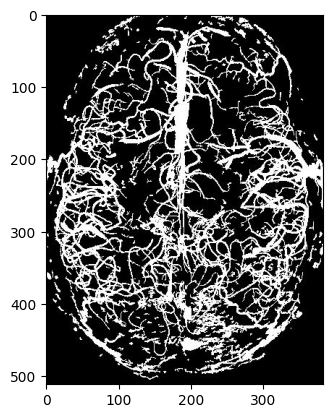

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../../saved_imgs/generated_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### With preprocessing

If you set prep_mode to 1,2 or 3, which means (1) N4 bias field correction, (2) denosing or (3) both of them will happen, then you have to set a path to store the preprocessed images e.g. *-ps_path ./data/preprocessed/*. In the following example, we set the preprocessing mode to "applying N4 bias field correction only".

In [7]:
!python ./../prediction.py --ds_path ./../../data/img/ --ps_path ./../../data/preprocessed/ --out_path ./../../saved_imgs/generated_label_2/ --pretrained ./../saved_models/test_model --prep_mode 1

./../../saved_imgs/generated_label_2/ does not exist.
./../../saved_imgs/generated_label_2/ has been created!
Inference session will start shortly..
The preprocessing procedure is starting!

100%|█████████████████████████████████████████████| 1/1 [01:31<00:00, 91.77s/it]
All processed images are successfully saved!
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:33<00:00,  5.61s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



MIP image:

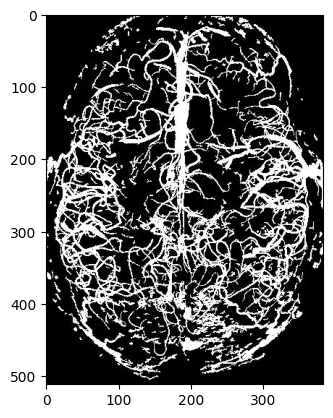

In [8]:
mip_image = img.imread("./../../saved_imgs/generated_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')